In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn import tree
import pydotplus

In [65]:
data = pd.read_csv("user_satisfaction_survey.csv")
data.head()

,ID,Classes_per_week,Happy_with_instructors,Happy_with_class_duration,Happy_with_class_timings,Happy_with_class_size,Happy_with_facilities,Happy_with_price,Churn
0,100,3,Yes,Yes,No,Yes,Yes,Yes,No
1,101,4,Yes,No,Yes,Yes,No,No,No
2,102,3,No,Yes,Yes,Yes,Yes,No,Yes
3,103,2,No,Yes,No,Yes,No,Yes,Yes
4,104,4,Yes,Yes,Yes,Yes,Yes,Yes,No


In [66]:
X = data.drop(['Churn','ID','Classes_per_week'], axis=1) #Dropping the ID column also - its not needed
y = data.drop(['ID','Classes_per_week','Happy_with_instructors','Happy_with_class_duration','Happy_with_class_timings','Happy_with_class_size','Happy_with_facilities','Happy_with_price'],axis=1)

In [67]:
#y.head()

In [68]:
def convert_yes_no(text):
    if 'Yes' in text:
        return 1
    else: return 0

In [69]:
X.Happy_with_instructors = X.Happy_with_instructors.apply(convert_yes_no)
X.Happy_with_class_duration = X.Happy_with_class_duration.apply(convert_yes_no)
X.Happy_with_class_timings = X.Happy_with_class_timings.apply(convert_yes_no)
X.Happy_with_class_size = X.Happy_with_class_size.apply(convert_yes_no)
X.Happy_with_facilities = X.Happy_with_facilities.apply(convert_yes_no)
X.Happy_with_price = X.Happy_with_price.apply(convert_yes_no)
y.Churn = y.Churn.apply(convert_yes_no)

In [70]:
#X.head()
#y.head()

In [89]:
def plot_dtree(model, feature_name):
    dot_data = StringIO()  
    tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=feature_name,
                         filled=True,
                         rounded=True,
                         )  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png("dt_visualization.png")
    return Image(graph.create_png())

In [90]:
X_train = X
Y_train = y
X_train.head()

,Happy_with_instructors,Happy_with_class_duration,Happy_with_class_timings,Happy_with_class_size,Happy_with_facilities,Happy_with_price
0,1,1,0,1,1,1
1,1,0,1,1,0,0
2,0,1,1,1,1,0
3,0,1,0,1,0,1
4,1,1,1,1,1,1


In [91]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train,Y_train)


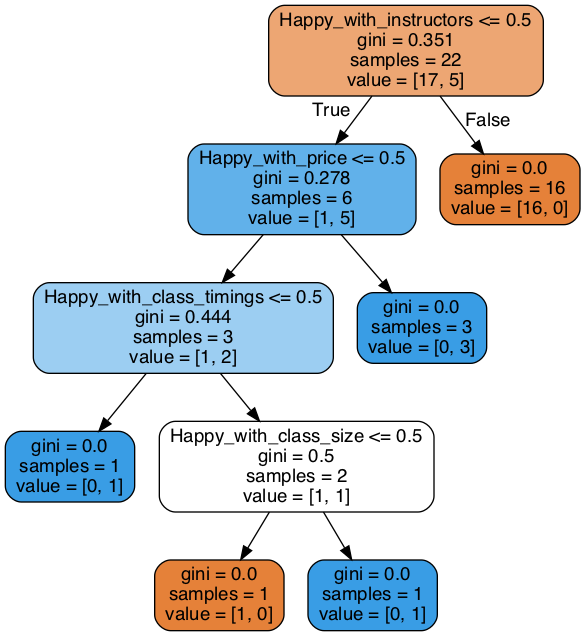

In [92]:
plot_dtree(model, X_train.columns)

In [88]:
graph.write_png("dt_visualization.png")

NameError: name 'graph' is not defined